The distance between each point and its closest centroid: 1.7012314528109918
The distance between each point and its closest centroid: 1.7337312595533294
The distance between each point and its closest centroid: 1.745034985017122
The distance between each point and its closest centroid: 1.7500085519414894
The distance between each point and its closest centroid: 1.752117513227962
The distance between each point and its closest centroid: 1.756031854448831
The distance between each point and its closest centroid: 1.7574548995377157
The distance between each point and its closest centroid: 1.7585967857954725
The distance between each point and its closest centroid: 1.759315174653559
The distance between each point and its closest centroid: 1.7596937190782644
The distance between each point and its closest centroid: 1.7599814950417862
The distance between each point and its closest centroid: 1.7603254399179784
The distance between each point and its closest centroid: 1.7603254399179784
The

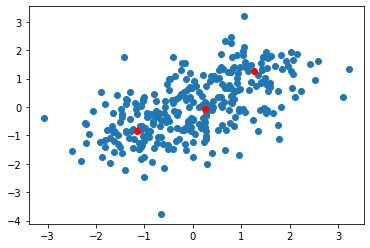

In [23]:
import numpy as np
from matplotlib import pyplot as plt

def k_means(points, K, max_iterations=20, init_states=None):
    N, D = points.shape
    if init_states is None:
        init_states = np.random.rand(K, D)

    cur_iter = 0
    centroids = init_states
    while cur_iter < max_iterations:
        # Assign each point to the closest centroid
        dist = np.linalg.norm(points[:, None, :] - centroids[None, :, :], axis=2)
        closest_centroid = np.argmin(dist, axis=1)
        
        # Update the centroids
        for i in range(K):
            centroids[i] = np.mean(points[closest_centroid == i], axis=0)

        # Compute the distance between each point and its closest centroid
        dist_to_centroid = np.linalg.norm(points[:, None, :] - centroids[None, closest_centroid, :], axis=2).mean()
        print(f'The distance between each point and its closest centroid: {dist_to_centroid}')
        cur_iter += 1

    assign_points = []
    for i in range(K):
        assign_points.append(points[closest_centroid == i])
    return centroids, assign_points

cluster1 = np.random.normal(0, 0.7, (100, 2))
cluster2 = np.random.normal(-1, 0.7, (100, 2))
cluster3 = np.random.normal(1, 0.7, (100, 2))
points = np.concatenate([cluster1, cluster2, cluster3], axis=0)

centroids, assign_points = k_means(points, K=3)
plt.plot(points[:, 0], points[:, 1], 'o')
plt.plot(centroids[:, 0], centroids[:, 1], 'ro')
plt.show()

(200, 2)


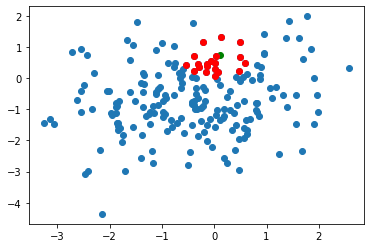

In [27]:
import numpy as np
from matplotlib import pyplot as plt

def knn_search(search_point, points, labels, K):
    N, D = points.shape
    dist = np.linalg.norm(points - search_point[None, :], axis=1)
    indices = np.argsort(dist)[:K]
    candidate_label = labels[indices]
    label = np.argmax(np.bincount(candidate_label.reshape(-1)))
    return label, indices

points = np.concatenate([
    np.random.normal(0, 1, (100, 2)),
    np.random.normal(-1, 1, (100, 2)),
], axis=0)
labels = np.concatenate([
    np.zeros((100, 1), dtype=np.int32),
    np.ones((100, 1), dtype=np.int32)
], axis=0)
p = np.array([0.12, 0.75])

label, indices = knn_search(p, points, labels, K=20)
print(points.shape)
plt.plot(p[0], p[1], 'go')
plt.plot(points[:, 0], points[:, 1], 'o')
plt.plot(points[indices][:, 0], points[indices][:, 1], 'ro')
plt.show()

In [1]:
import numpy as np

l = np.random.randint(0, 5, (10))
max_num_indices = l.

[0 4 3 0 2 3 3 3 3 4]


In [11]:
print(bin(4))
print(bin(-4))
print(~4)
4 & (-4)

0b100
-0b100
-5


4

In [4]:
def find_k(n, k):
	return (n >> k) & 1

n = 24
print(bin(n))
for i in range(len(bin(n))):
    print(find_k(n, i))

0b11000
0
0
0
1
1
0
0


In [31]:
import numpy as np


class Conv:
    def __init__(self, in_channel, out_channel, kernel_size=3, padding=0, stride=1):
        self.in_channel = in_channel
        self.out_channel = out_channel
        self.kernel_size = kernel_size
        self.padding = padding
        self.stride = stride
        self.filter = np.random.randn(in_channel, out_channel, kernel_size, kernel_size) / (kernel_size * kernel_size)

    def iter_regions(self, images):
        padded_images = np.pad(images, ((0, 0), (self.padding, self.padding), \
                (self.padding, self.padding)), 'constant', constant_values=0)

        _, _H, _W = padded_images.shape
        for i in range(0, (_H - self.kernel_size + 1) // self.stride, self.stride):
            for j in range(0, (_W - self.kernel_size + 1) // self.stride, self.stride):
                region = padded_images[:, i: i + self.kernel_size, j: j + self.kernel_size]
                yield region, i, j

    def forward(self, images):
        assert len(images.shape) == 3, f"Shape of images should be (C, H, W)"
        _, H, W = images.shape
        
        output_H = (H + 2 * self.padding - self.kernel_size) // self.stride + 1
        output_W = (W + 2 * self.padding - self.kernel_size) // self.stride + 1
        output = np.zeros((self.out_channel, output_H, output_W))

        for region, i, j in self.iter_regions(images):
            output[:, i, j] = (self.filter.transpose(1, 0, 2, 3) * region).sum(axis=(1, 2, 3))

        return output

    def __call__(self, images):
        return self.forward(images)

    # TODO
    '''
    def backward(self):
        pass
    '''


conv3x3 = Conv(3, 8, 4, 0, 2)
x = np.random.rand(3, 26, 26)
y = conv3x3(x)
print(y.shape)


(8, 12, 12)


In [26]:
13 // 4

3

In [9]:
import torch
import torch.nn as nn
import numpy as np

x = torch.rand(4, 10)
y = torch.tensor([1, 0, 0, 1], dtype=int)
y[2] = np.nan
print(y)
ce = nn.CrossEntropyLoss()

loss = ce(x, y)
print(loss)

RuntimeError: value cannot be converted to type int64_t without overflow: nan

In [17]:
import torch
import torch.nn as nn
import numpy as np

x = np.random.rand(4, 2)
y = np.array([
    0, 1, 1, np.nan
])
print(y)
ce = nn.CrossEntropyLoss()

x, y = torch.from_numpy(x), torch.from_numpy(y)
y = y.long()
print(x)
print(y)
loss = ce(x, y)
print(loss)

[ 0.  1.  1. nan]
tensor([[0.2051, 0.6958],
        [0.9428, 0.8744],
        [0.3118, 0.9690],
        [0.7936, 0.5108]], dtype=torch.float64)
tensor([                   0,                    1,                    1,
        -9223372036854775808])


IndexError: Target -9223372036854775808 is out of bounds.